In [1]:
from PIL import Image
from pathlib import Path
import numpy as np

In [2]:
from fastai.vision.all import *

In [8]:
path_data_path = Path('/home/ec2-user/SageMaker/tiled_test/')

path_img = Path('/home/ec2-user/SageMaker/tiled_test/test')
path_lbl = Path('/home/ec2-user/SageMaker/tiled_test/mask')
# get images and labels filenames
img_f_names = get_image_files(path_img)
lbl_f_names = get_image_files(path_lbl)

print(len(img_f_names), len(lbl_f_names))

117 117


In [9]:
lbl_f_names[1]

Path('/home/ec2-user/SageMaker/tiled_test/mask/0-07f5b7015.jpg')

In [10]:
def label_func(x):
    return path_lbl/f"{x.name}"

In [11]:

# label_func(lbl_f_names[1])
# print(label_func(img_f_names))
dls = SegmentationDataLoaders.from_label_func(
    path_img, bs=8, fnames = img_f_names, label_func = label_func
)

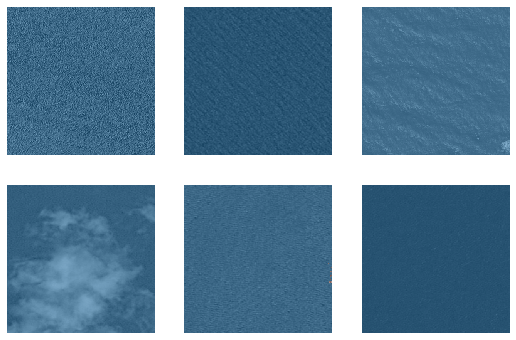

In [12]:
dls.show_batch(max_n=6)

In [13]:
learn = unet_learner(dls, resnet34,n_out=3)
# learn.show_results(max_n=6, figsize=(7,8))

In [26]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,time
0,0.031767,0.042464,00:24


epoch,train_loss,valid_loss,time
0,0.008182,0.006716,00:24
1,0.006420,0.007555,00:24
2,0.005436,0.011658,00:24


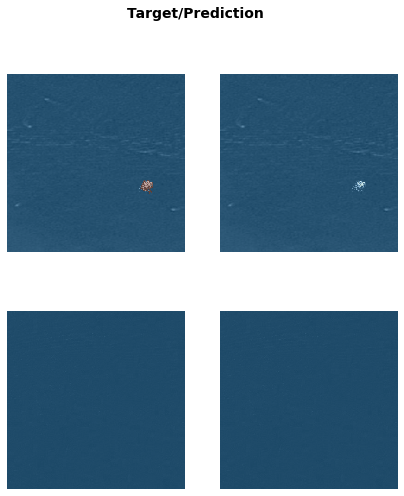

In [27]:
learn.show_results(max_n=6, figsize=(7,8))

In [34]:
learn.export(fname='/home/ec2-user/SageMaker/cloudSeg/plastic.pkl',pickle_module=pickle, pickle_protocol=2)

In [33]:
pwd

'/home/ec2-user/SageMaker/cloudSeg'

In [36]:
learn2=load_learner('/home/ec2-user/SageMaker/cloudSeg/plastic.pkl')

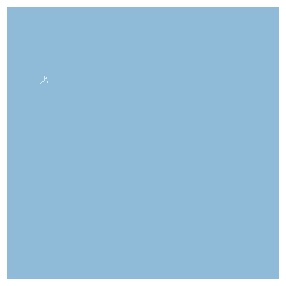

In [44]:
learn2.predict('/home/ec2-user/SageMaker/tiled_test/test/0-0c4434059.jpg')[0].show(figsize=(5,5))